# 📈  Analysis of INE population data

The project will consist of connecting to the database of the INE, the national statistics institute of Spain. Once the connection is made and understood, we will proceed to download a dataset with population data in Spain. Our objective will be to clean this data and analyze it to draw a series of conclusions about how the Spanish population has varied over time. Finally, we will ingest the clean data into a DB

As a secondary objective we have to leave the dataset clean and prepared to make the visualizations of the second part of the project.

Tools to use
For this project we will use the Python language with the libraries: pandas, numpy, request, datetime, matplotlib.pyplot, seaborn and os.

Development | Execution

In [1]:
import pandas as pd
import requests
import datetime

!pip install openpyxl
import openpyxl

#function that takes a code from the INE and returns a json with the INE data
# connects us with the INE
def ine_request(ine_code):
    resultados = 999
    path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
    path = path_template.format(cod_serie=ine_code, n_ult_datos=resultados)
    json_request = requests.get(path).json()
    
    return json_request

# Reading the INE code file
df_codigos = pd.read_excel('ine_codes.xlsx')
# Transformation into a list of the INE code column of df df_codigos
codigos = df_codigos['ine_code'].tolist()

fecha_lista = []
variable_lista = list()
valor_lista = list()

# go through the list with the INE codes
for codigo in codigos:
    # I load the result of the ine_request() function into 'data'
    datos = ine_request(codigo)
    
    # I load in nombre_variable 
    nombre_variable = datos['Nombre']
    
    # Take the attributes of each data series
    for dato in datos['Data']:

        fecha = datetime.date.fromtimestamp(dato['Fecha'] // 1000)
        valor = dato['Valor']
        fecha_lista.append(fecha)
        variable_lista.append(nombre_variable)
        valor_lista.append(valor)

#  create a dataframe with all the data lists       
df = pd.DataFrame({
        'Fecha': fecha_lista,
        'Dato' : variable_lista,
        'Población' : valor_lista
    })

# Save the dataframe in an excel
df.to_excel('tabla_ine.xlsx', index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
df_codigos

,ine_code,descrición
0,CP335,población
1,CP300335,población hombres
2,CP300334,población mujeres


In [3]:
df_codigos['ine_code']

0       CP335
1    CP300335
2    CP300334
Name: ine_code, dtype: object

In [4]:
df_codigos.ine_code.tolist()

['CP335', 'CP300335', 'CP300334']

In [5]:
ine_request('CP335')

{'COD': 'CP335',
 'Nombre': 'Total Nacional. Todas las edades. Total. Población. Número. ',
 'FK_Unidad': 3,
 'FK_Escala': 1,
 'Notas': [{'texto': 'https://www.ine.es/inebaseDYN/cp30321/cp_inicio.htm#~#https://www.ine.es/consul/serie.do?s=CP335&nult=100&TB_iframe=true&position=center&width=700&height=500&L=0&nocab=1',
   'Fk_TipoNota': 6,
   'textoTipo': None}],
 'Data': [{'Fecha': 31532400000,
   'FK_TipoDato': 1,
   'FK_Periodo': 26,
   'Anyo': 1971,
   'Valor': 34040642.0,
   'Secreto': False},
  {'Fecha': 47170800000,
   'FK_TipoDato': 1,
   'FK_Periodo': 27,
   'Anyo': 1971,
   'Valor': 34216856.0,
   'Secreto': False},
  {'Fecha': 63068400000,
   'FK_TipoDato': 1,
   'FK_Periodo': 26,
   'Anyo': 1972,
   'Valor': 34408338.0,
   'Secreto': False},
  {'Fecha': 78793200000,
   'FK_TipoDato': 1,
   'FK_Periodo': 27,
   'Anyo': 1972,
   'Valor': 34595886.0,
   'Secreto': False},
  {'Fecha': 94690800000,
   'FK_TipoDato': 1,
   'FK_Periodo': 26,
   'Anyo': 1973,
   'Valor': 34800600.0,

In [6]:
path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
path = path_template.format(cod_serie='CP335', n_ult_datos=999)

In [7]:
path

'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/CP335?nult=999'

In [8]:
datos['Nombre']

'Total Nacional. Todas las edades. Mujeres. Población. Número. '

In [9]:
fecha_lista

[datetime.date(1970, 12, 31),
 datetime.date(1971, 6, 30),
 datetime.date(1971, 12, 31),
 datetime.date(1972, 6, 30),
 datetime.date(1972, 12, 31),
 datetime.date(1973, 6, 30),
 datetime.date(1973, 12, 31),
 datetime.date(1974, 6, 30),
 datetime.date(1974, 12, 31),
 datetime.date(1975, 6, 30),
 datetime.date(1975, 12, 31),
 datetime.date(1976, 6, 30),
 datetime.date(1976, 12, 31),
 datetime.date(1977, 6, 30),
 datetime.date(1977, 12, 31),
 datetime.date(1978, 6, 30),
 datetime.date(1978, 12, 31),
 datetime.date(1979, 6, 30),
 datetime.date(1979, 12, 31),
 datetime.date(1980, 6, 30),
 datetime.date(1980, 12, 31),
 datetime.date(1981, 6, 30),
 datetime.date(1981, 12, 31),
 datetime.date(1982, 6, 30),
 datetime.date(1982, 12, 31),
 datetime.date(1983, 6, 30),
 datetime.date(1983, 12, 31),
 datetime.date(1984, 6, 30),
 datetime.date(1984, 12, 31),
 datetime.date(1985, 6, 30),
 datetime.date(1985, 12, 31),
 datetime.date(1986, 6, 30),
 datetime.date(1986, 12, 31),
 datetime.date(1987, 6, 30

In [10]:
len(fecha_lista)

312

In [11]:
df

,Fecha,Dato,Población
0,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0
1,1971-06-30,Total Nacional. Todas las edades. Total. Pobla...,34216856.0
2,1971-12-31,Total Nacional. Todas las edades. Total. Pobla...,34408338.0
3,1972-06-30,Total Nacional. Todas las edades. Total. Pobla...,34595886.0
4,1972-12-31,Total Nacional. Todas las edades. Total. Pobla...,34800600.0
...,...,...,...
307,2020-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24146903.0
308,2020-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24171413.0
309,2021-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24140027.0
310,2021-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24195741.0


In [12]:
df=df.rename(columns = {'Fecha':'fecha', 'Dato': 'dato', 'Población': 'poblacion'})

In [13]:
df

,fecha,dato,poblacion
0,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0
1,1971-06-30,Total Nacional. Todas las edades. Total. Pobla...,34216856.0
2,1971-12-31,Total Nacional. Todas las edades. Total. Pobla...,34408338.0
3,1972-06-30,Total Nacional. Todas las edades. Total. Pobla...,34595886.0
4,1972-12-31,Total Nacional. Todas las edades. Total. Pobla...,34800600.0
...,...,...,...
307,2020-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24146903.0
308,2020-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24171413.0
309,2021-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24140027.0
310,2021-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24195741.0


### Exploring 'poblacion'

In [14]:
max(df.poblacion)/1000000

47.615034

In [15]:
min(df.poblacion)/1000000

16.641744

### Exploring 'fecha'

In [16]:
max(df.fecha)

datetime.date(2022, 6, 30)

In [17]:
min(df.fecha)

datetime.date(1970, 12, 31)

### Formatting the 'data' column

In [18]:
df.dato[0]

'Total Nacional. Todas las edades. Total. Población. Número. '

In [19]:
df.dato[311]

'Total Nacional. Todas las edades. Mujeres. Población. Número. '

In [20]:
df.dato[0].split('. ')[2]

'Total'

In [21]:
df.dato.str.split('. ').str.get(5)

0        Total
1        Total
2        Total
3        Total
4        Total
        ...   
307    Mujeres
308    Mujeres
309    Mujeres
310    Mujeres
311    Mujeres
Name: dato, Length: 312, dtype: object

In [22]:
df['dato_2'] = df.dato.str.split('. ').str.get(5)

In [23]:
df

,fecha,dato,poblacion,dato_2
0,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0,Total
1,1971-06-30,Total Nacional. Todas las edades. Total. Pobla...,34216856.0,Total
2,1971-12-31,Total Nacional. Todas las edades. Total. Pobla...,34408338.0,Total
3,1972-06-30,Total Nacional. Todas las edades. Total. Pobla...,34595886.0,Total
4,1972-12-31,Total Nacional. Todas las edades. Total. Pobla...,34800600.0,Total
...,...,...,...,...
307,2020-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24146903.0,Mujeres
308,2020-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24171413.0,Mujeres
309,2021-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24140027.0,Mujeres
310,2021-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24195741.0,Mujeres


In [24]:
df[df.dato_2 == 'Total']

,fecha,dato,poblacion,dato_2
0,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0,Total
1,1971-06-30,Total Nacional. Todas las edades. Total. Pobla...,34216856.0,Total
2,1971-12-31,Total Nacional. Todas las edades. Total. Pobla...,34408338.0,Total
3,1972-06-30,Total Nacional. Todas las edades. Total. Pobla...,34595886.0,Total
4,1972-12-31,Total Nacional. Todas las edades. Total. Pobla...,34800600.0,Total
...,...,...,...,...
99,2020-06-30,Total Nacional. Todas las edades. Total. Pobla...,47355685.0,Total
100,2020-12-31,Total Nacional. Todas las edades. Total. Pobla...,47398695.0,Total
101,2021-06-30,Total Nacional. Todas las edades. Total. Pobla...,47331302.0,Total
102,2021-12-31,Total Nacional. Todas las edades. Total. Pobla...,47432893.0,Total


In [25]:
df[df.dato_2 == 'Mujeres']

,fecha,dato,poblacion,dato_2
208,1970-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17398898.0,Mujeres
209,1971-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17485953.0,Mujeres
210,1971-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17580397.0,Mujeres
211,1972-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17672353.0,Mujeres
212,1972-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17772628.0,Mujeres
...,...,...,...,...
307,2020-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24146903.0,Mujeres
308,2020-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24171413.0,Mujeres
309,2021-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24140027.0,Mujeres
310,2021-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24195741.0,Mujeres


In [26]:
df[df.dato_2 == 'Mujeres'].poblacion.max()/1000000

24.304407

In [27]:
df[df.dato_2 == 'Hombres'].poblacion.max()/1000000

23.310627

In [28]:
df[df.dato_2 == 'Total'].poblacion.max()/1000000

47.615034

In [29]:
df[df.dato_2 == 'Mujeres'].poblacion.min()/1000000

17.398898

In [30]:
df[df.dato_2 == 'Hombres'].poblacion.min()/1000000

16.641744

In [31]:
df[df.dato_2 == 'Total'].poblacion.min()/1000000

34.040642

In [32]:
df[df.dato_2 == 'Mujeres'].fecha.max()

datetime.date(2022, 6, 30)

In [33]:
df[df.dato_2 == 'Hombres'].fecha.max()

datetime.date(2022, 6, 30)

In [34]:
df[df.dato_2 == 'Total'].fecha.max()

datetime.date(2022, 6, 30)

In [35]:
df[df.dato_2 == 'Mujeres'].fecha.min()

datetime.date(1970, 12, 31)

In [36]:
df[df.dato_2 == 'Hombres'].fecha.min()

datetime.date(1970, 12, 31)

In [37]:
df[df.dato_2 == 'Total'].fecha.min()

datetime.date(1970, 12, 31)

In [38]:
df.groupby('dato_2').max()

,fecha,dato,poblacion
dato_2,,,
Hombres,2022-06-30,Total Nacional. Todas las edades. Hombres. Pob...,23310627.0
Mujeres,2022-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24304407.0
Total,2022-06-30,Total Nacional. Todas las edades. Total. Pobla...,47615034.0


In [39]:
df.groupby('dato_2').min()

,fecha,dato,poblacion
dato_2,,,
Hombres,1970-12-31,Total Nacional. Todas las edades. Hombres. Pob...,16641744.0
Mujeres,1970-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17398898.0
Total,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0


In [40]:
df.groupby('dato_2').aggregate(['max', 'min', 'mean'])

poblacion                          
                max         min          mean
dato_2                                       
Hombres  23310627.0  16641744.0  2.020241e+07
Mujeres  24304407.0  17398898.0  2.094578e+07
Total    47615034.0  34040642.0  4.114819e+07

In [41]:
df.groupby('dato_2').poblacion.transform('mean').apply(lambda x: format(x, '0.2f'))

0      41148193.47
1      41148193.47
2      41148193.47
3      41148193.47
4      41148193.47
          ...     
307    20945782.89
308    20945782.89
309    20945782.89
310    20945782.89
311    20945782.89
Name: poblacion, Length: 312, dtype: object

In [42]:
df['medias_pob'] =df.groupby('dato_2').poblacion.transform('mean').apply(lambda x: format(x, '0.2f'))

In [43]:
df

,fecha,dato,poblacion,dato_2,medias_pob
0,1970-12-31,Total Nacional. Todas las edades. Total. Pobla...,34040642.0,Total,41148193.47
1,1971-06-30,Total Nacional. Todas las edades. Total. Pobla...,34216856.0,Total,41148193.47
2,1971-12-31,Total Nacional. Todas las edades. Total. Pobla...,34408338.0,Total,41148193.47
3,1972-06-30,Total Nacional. Todas las edades. Total. Pobla...,34595886.0,Total,41148193.47
4,1972-12-31,Total Nacional. Todas las edades. Total. Pobla...,34800600.0,Total,41148193.47
...,...,...,...,...,...
307,2020-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24146903.0,Mujeres,20945782.89
308,2020-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24171413.0,Mujeres,20945782.89
309,2021-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,24140027.0,Mujeres,20945782.89
310,2021-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,24195741.0,Mujeres,20945782.89


In [44]:
df.medias_pob.dtype

dtype('O')

In [45]:
df.medias_pob.apply(lambda x: float(x))

0      41148193.47
1      41148193.47
2      41148193.47
3      41148193.47
4      41148193.47
          ...     
307    20945782.89
308    20945782.89
309    20945782.89
310    20945782.89
311    20945782.89
Name: medias_pob, Length: 312, dtype: float64

In [46]:
df.medias_pob = df.medias_pob.apply(lambda x: float(x))

In [47]:
df.poblacion - df.medias_pob

0     -7107551.47
1     -6931337.47
2     -6739855.47
3     -6552307.47
4     -6347593.47
          ...    
307    3201120.11
308    3225630.11
309    3194244.11
310    3249958.11
311    3358624.11
Length: 312, dtype: float64

In [48]:
df['diferencia_medias_pob'] = df.poblacion - df.medias_pob

In [49]:
df[(df.diferencia_medias_pob < 0) & (df.dato_2 == 'Hombres')]

,fecha,dato,poblacion,dato_2,medias_pob,diferencia_medias_pob
104,1970-12-31,Total Nacional. Todas las edades. Hombres. Pob...,16641744.0,Hombres,20202410.58,-3560666.58
105,1971-06-30,Total Nacional. Todas las edades. Hombres. Pob...,16730904.0,Hombres,20202410.58,-3471506.58
106,1971-12-31,Total Nacional. Todas las edades. Hombres. Pob...,16827942.0,Hombres,20202410.58,-3374468.58
107,1972-06-30,Total Nacional. Todas las edades. Hombres. Pob...,16923533.0,Hombres,20202410.58,-3278877.58
108,1972-12-31,Total Nacional. Todas las edades. Hombres. Pob...,17027972.0,Hombres,20202410.58,-3174438.58
...,...,...,...,...,...,...
162,1999-12-31,Total Nacional. Todas las edades. Hombres. Pob...,19826339.0,Hombres,20202410.58,-376071.58
163,2000-06-30,Total Nacional. Todas las edades. Hombres. Pob...,19868636.0,Hombres,20202410.58,-333774.58
164,2000-12-31,Total Nacional. Todas las edades. Hombres. Pob...,19923892.0,Hombres,20202410.58,-278518.58
165,2001-06-30,Total Nacional. Todas las edades. Hombres. Pob...,19973044.0,Hombres,20202410.58,-229366.58


In [50]:
pd.set_option('display.max_rows', 500)

In [51]:
df=df.assign(valor_previo_pob = lambda row: row.poblacion.shift(1), 
          incremento_pob = lambda row: row.poblacion - row.poblacion.shift(1))

In [52]:
df[df.dato_2 == 'Mujeres']

,fecha,dato,poblacion,dato_2,medias_pob,diferencia_medias_pob,valor_previo_pob,incremento_pob
208,1970-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17398898.0,Mujeres,20945782.89,-3546884.89,23310627.0,-5911729.0
209,1971-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17485953.0,Mujeres,20945782.89,-3459829.89,17398898.0,87055.0
210,1971-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17580397.0,Mujeres,20945782.89,-3365385.89,17485953.0,94444.0
211,1972-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17672353.0,Mujeres,20945782.89,-3273429.89,17580397.0,91956.0
212,1972-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17772628.0,Mujeres,20945782.89,-3173154.89,17672353.0,100275.0
213,1973-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17860714.0,Mujeres,20945782.89,-3085068.89,17772628.0,88086.0
214,1973-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17957230.0,Mujeres,20945782.89,-2988552.89,17860714.0,96516.0
215,1974-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,18048997.0,Mujeres,20945782.89,-2896785.89,17957230.0,91767.0
216,1974-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,18150004.0,Mujeres,20945782.89,-2795778.89,18048997.0,101007.0
217,1975-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,18237105.0,Mujeres,20945782.89,-2708677.89,18150004.0,87101.0


In [53]:
import numpy as np

df.loc[208, ['valor_previo_pob', 'incremento_pob']] = np.nan

In [54]:
df.loc[104, ['valor_previo_pob', 'incremento_pob']] = np.nan

In [55]:
df[df.dato_2 == 'Hombres']

,fecha,dato,poblacion,dato_2,medias_pob,diferencia_medias_pob,valor_previo_pob,incremento_pob
104,1970-12-31,Total Nacional. Todas las edades. Hombres. Pob...,16641744.0,Hombres,20202410.58,-3560666.58,NaN,NaN
105,1971-06-30,Total Nacional. Todas las edades. Hombres. Pob...,16730904.0,Hombres,20202410.58,-3471506.58,16641744.0,89160.0
106,1971-12-31,Total Nacional. Todas las edades. Hombres. Pob...,16827942.0,Hombres,20202410.58,-3374468.58,16730904.0,97038.0
107,1972-06-30,Total Nacional. Todas las edades. Hombres. Pob...,16923533.0,Hombres,20202410.58,-3278877.58,16827942.0,95591.0
108,1972-12-31,Total Nacional. Todas las edades. Hombres. Pob...,17027972.0,Hombres,20202410.58,-3174438.58,16923533.0,104439.0
109,1973-06-30,Total Nacional. Todas las edades. Hombres. Pob...,17119603.0,Hombres,20202410.58,-3082807.58,17027972.0,91631.0
110,1973-12-31,Total Nacional. Todas las edades. Hombres. Pob...,17220063.0,Hombres,20202410.58,-2982347.58,17119603.0,100460.0
111,1974-06-30,Total Nacional. Todas las edades. Hombres. Pob...,17314892.0,Hombres,20202410.58,-2887518.58,17220063.0,94829.0
112,1974-12-31,Total Nacional. Todas las edades. Hombres. Pob...,17419371.0,Hombres,20202410.58,-2783039.58,17314892.0,104479.0
113,1975-06-30,Total Nacional. Todas las edades. Hombres. Pob...,17512929.0,Hombres,20202410.58,-2689481.58,17419371.0,93558.0


In [56]:
df[df.dato_2 == 'Mujeres']

,fecha,dato,poblacion,dato_2,medias_pob,diferencia_medias_pob,valor_previo_pob,incremento_pob
208,1970-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17398898.0,Mujeres,20945782.89,-3546884.89,NaN,NaN
209,1971-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17485953.0,Mujeres,20945782.89,-3459829.89,17398898.0,87055.0
210,1971-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17580397.0,Mujeres,20945782.89,-3365385.89,17485953.0,94444.0
211,1972-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17672353.0,Mujeres,20945782.89,-3273429.89,17580397.0,91956.0
212,1972-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17772628.0,Mujeres,20945782.89,-3173154.89,17672353.0,100275.0
213,1973-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,17860714.0,Mujeres,20945782.89,-3085068.89,17772628.0,88086.0
214,1973-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,17957230.0,Mujeres,20945782.89,-2988552.89,17860714.0,96516.0
215,1974-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,18048997.0,Mujeres,20945782.89,-2896785.89,17957230.0,91767.0
216,1974-12-31,Total Nacional. Todas las edades. Mujeres. Pob...,18150004.0,Mujeres,20945782.89,-2795778.89,18048997.0,101007.0
217,1975-06-30,Total Nacional. Todas las edades. Mujeres. Pob...,18237105.0,Mujeres,20945782.89,-2708677.89,18150004.0,87101.0


In [57]:
df.fecha[(df.incremento_pob <0)& (df.dato_2 == 'Total')]

83     2012-06-30
84     2012-12-31
85     2013-06-30
86     2013-12-31
87     2014-06-30
88     2014-12-31
89     2015-06-30
101    2021-06-30
Name: fecha, dtype: object

In [58]:
import datetime

In [59]:
df.fecha

0      1970-12-31
1      1971-06-30
2      1971-12-31
3      1972-06-30
4      1972-12-31
5      1973-06-30
6      1973-12-31
7      1974-06-30
8      1974-12-31
9      1975-06-30
10     1975-12-31
11     1976-06-30
12     1976-12-31
13     1977-06-30
14     1977-12-31
15     1978-06-30
16     1978-12-31
17     1979-06-30
18     1979-12-31
19     1980-06-30
20     1980-12-31
21     1981-06-30
22     1981-12-31
23     1982-06-30
24     1982-12-31
25     1983-06-30
26     1983-12-31
27     1984-06-30
28     1984-12-31
29     1985-06-30
30     1985-12-31
31     1986-06-30
32     1986-12-31
33     1987-06-30
34     1987-12-31
35     1988-06-30
36     1988-12-31
37     1989-06-30
38     1989-12-31
39     1990-06-30
40     1990-12-31
41     1991-06-30
42     1991-12-31
43     1992-06-30
44     1992-12-31
45     1993-06-30
46     1993-12-31
47     1994-06-30
48     1994-12-31
49     1995-06-30
50     1995-12-31
51     1996-06-30
52     1996-12-31
53     1997-06-30
54     1997-12-31
55     199

In [60]:
pd.set_option('display.max_rows', 20)

In [61]:
df.fecha=pd.to_datetime(df.fecha)

In [62]:
df.fecha[0].year

1970

In [63]:
df.fecha.apply(lambda x: x.year)

0      1970
1      1971
2      1971
3      1972
4      1972
       ... 
307    2020
308    2020
309    2021
310    2021
311    2022
Name: fecha, Length: 312, dtype: int64

In [64]:
df['año'] = df.fecha.apply(lambda x: x.year)

In [65]:
df['mes'] = df.fecha.apply(lambda x: x.month)

In [66]:
df.año.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [67]:
#Clasificamos segun las decadas

df['decadas'] = pd.cut(df.año, bins = [1970, 1979, 1989, 1999,2009, 2019, 2022], labels = ['setentas', 'ochentas', 'noventas', 'dosmil', 'dosmildiez', 'dosmilveinte'])

In [68]:
df.groupby(['dato_2', 'decadas']).incremento_pob.sum()

dato_2   decadas     
Hombres  setentas        1681769.0
         ochentas         716272.0
         noventas         786554.0
         dosmil          3155933.0
         dosmildiez       217041.0
         dosmilveinte     111314.0
Mujeres  setentas        1624529.0
         ochentas         790015.0
         noventas         830401.0
         dosmil          2860506.0
         dosmildiez       628952.0
         dosmilveinte     171106.0
Total    setentas        3306298.0
         ochentas        1506287.0
         noventas        1616955.0
         dosmil          6016439.0
         dosmildiez       845993.0
         dosmilveinte     282420.0
Name: incremento_pob, dtype: float64

In [69]:
df.to_csv('poblacion_INE_limpio.csv', index = False)

## Part II - Visualization

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


In [71]:
pwd

'/datasets/_deepnote_work'

In [72]:
df = pd.read_csv('poblacion_INE_limpio.csv')

In [73]:
pwd

'/datasets/_deepnote_work'

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha                  312 non-null    object 
 1   dato                   312 non-null    object 
 2   poblacion              312 non-null    float64
 3   dato_2                 312 non-null    object 
 4   medias_pob             312 non-null    float64
 5   diferencia_medias_pob  312 non-null    float64
 6   valor_previo_pob       309 non-null    float64
 7   incremento_pob         309 non-null    float64
 8   año                    312 non-null    int64  
 9   mes                    312 non-null    int64  
 10  decadas                309 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 26.9+ KB


In [75]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')

In [76]:
df = pd.read_csv('poblacion_INE_limpio.csv', parse_dates = ['fecha'], date_parser = dateparse)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  312 non-null    datetime64[ns]
 1   dato                   312 non-null    object        
 2   poblacion              312 non-null    float64       
 3   dato_2                 312 non-null    object        
 4   medias_pob             312 non-null    float64       
 5   diferencia_medias_pob  312 non-null    float64       
 6   valor_previo_pob       309 non-null    float64       
 7   incremento_pob         309 non-null    float64       
 8   año                    312 non-null    int64         
 9   mes                    312 non-null    int64         
 10  decadas                309 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 26.9+ KB


In [78]:
def plot_df(x, y, title, xlabel, ylabel):
    plt.figure(figsize = (9, 4))
    plt.plot(x,y, color = 'tab:red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title (title)
    plt.grid()
    plt.xticks(rotation = 45)
    ;

In [79]:
df.dato_2.unique()

array(['Total', 'Hombres', 'Mujeres'], dtype=object)

Mujeres


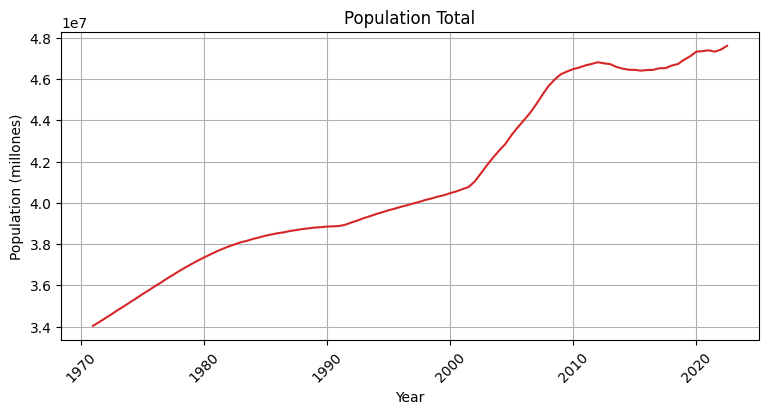

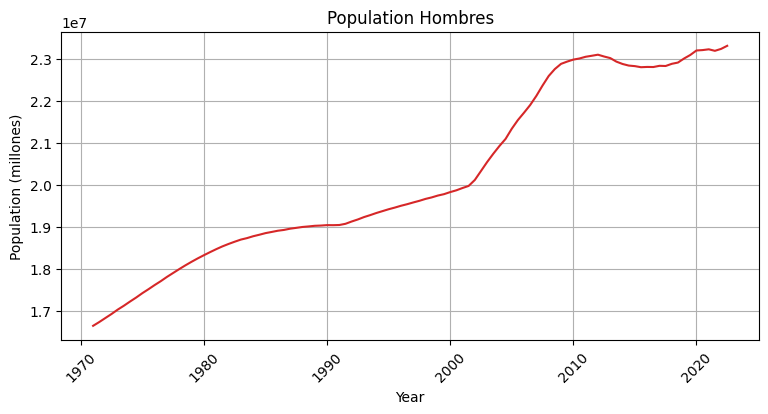

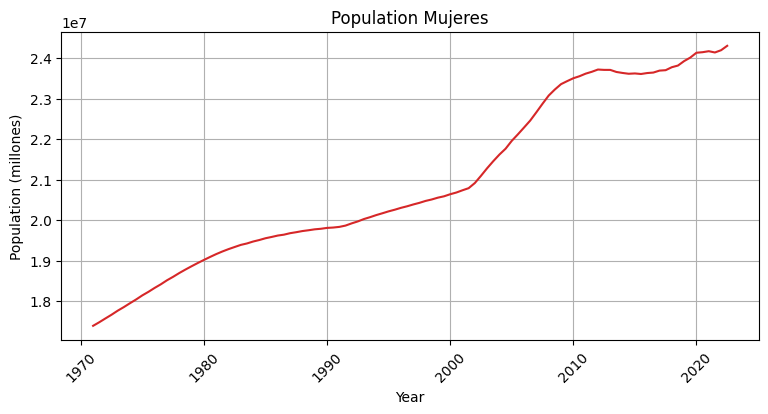

In [80]:
for i in df.dato_2.unique():
    plot_df(df.fecha[df.dato_2 == i], df.poblacion[df.dato_2 == i], 'Población {0}'.format(i), 'Año', 'Población (millones)')
print(i)

In [81]:
import matplotlib as mlp

In [82]:
list(mlp.colors.XKCD_COLORS.keys())

['xkcd:cloudy blue',
 'xkcd:dark pastel green',
 'xkcd:dust',
 'xkcd:electric lime',
 'xkcd:fresh green',
 'xkcd:light eggplant',
 'xkcd:nasty green',
 'xkcd:really light blue',
 'xkcd:tea',
 'xkcd:warm purple',
 'xkcd:yellowish tan',
 'xkcd:cement',
 'xkcd:dark grass green',
 'xkcd:dusty teal',
 'xkcd:grey teal',
 'xkcd:macaroni and cheese',
 'xkcd:pinkish tan',
 'xkcd:spruce',
 'xkcd:strong blue',
 'xkcd:toxic green',
 'xkcd:windows blue',
 'xkcd:blue blue',
 'xkcd:blue with a hint of purple',
 'xkcd:booger',
 'xkcd:bright sea green',
 'xkcd:dark green blue',
 'xkcd:deep turquoise',
 'xkcd:green teal',
 'xkcd:strong pink',
 'xkcd:bland',
 'xkcd:deep aqua',
 'xkcd:lavender pink',
 'xkcd:light moss green',
 'xkcd:light seafoam green',
 'xkcd:olive yellow',
 'xkcd:pig pink',
 'xkcd:deep lilac',
 'xkcd:desert',
 'xkcd:dusty lavender',
 'xkcd:purpley grey',
 'xkcd:purply',
 'xkcd:candy pink',
 'xkcd:light pastel green',
 'xkcd:boring green',
 'xkcd:kiwi green',
 'xkcd:light grey green',
 

In [83]:
np.random.seed(13)
mycolors = np.random.choice(list(mlp.colors.XKCD_COLORS.keys()), 3, replace = False)

In [84]:
mycolors

array(['xkcd:baby poop green', 'xkcd:navy green', 'xkcd:purpley pink'],
      dtype='<U31')

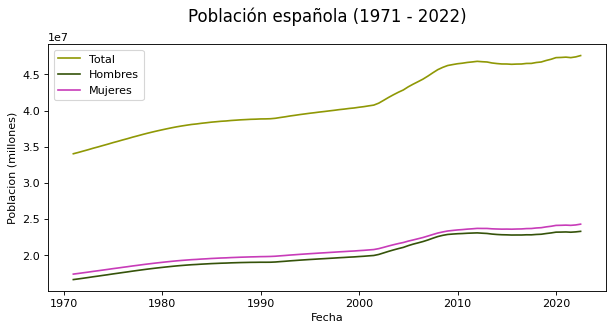

In [85]:
plt.figure(figsize = (9,4), dpi = 80)
for i, d in enumerate(df.dato_2.unique()):
    plt.plot('fecha','poblacion', data = df[df.dato_2 == d], color = mycolors[i], label=d)
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Poblacion (millones)')
plt.title ('Población española (1971 - 2022)', fontsize=15, pad = 20);

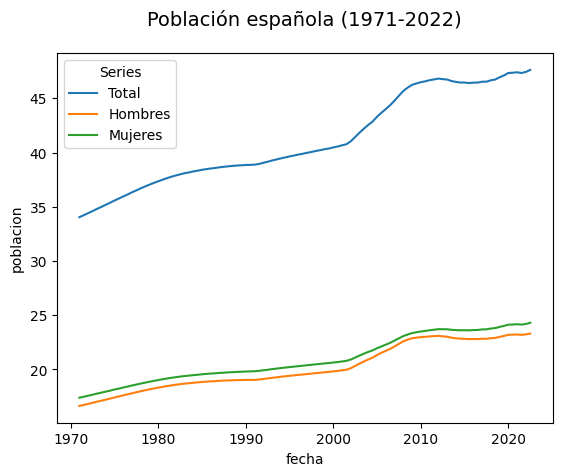

In [86]:
sns.lineplot(x= df.fecha, y = df.poblacion/1000000, hue= df.dato_2)
plt.title('Población española (1971-2022)', pad = 20, size=14)
plt.legend(title = 'Series');

In [87]:
sns.set_theme(style = 'whitegrid')

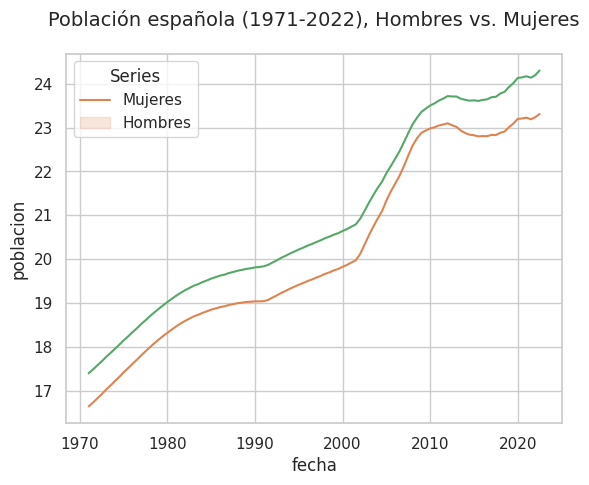

In [88]:
sns.lineplot(x= df.fecha[df.dato_2 != 'Total'], y = df.poblacion/1000000, hue= df.dato_2)
plt.title('Población española (1971-2022), Hombres vs. Mujeres',fontsize = 14, pad = 20, size=14)
plt.legend(title = 'Series', labels =['Mujeres', 'Hombres']);

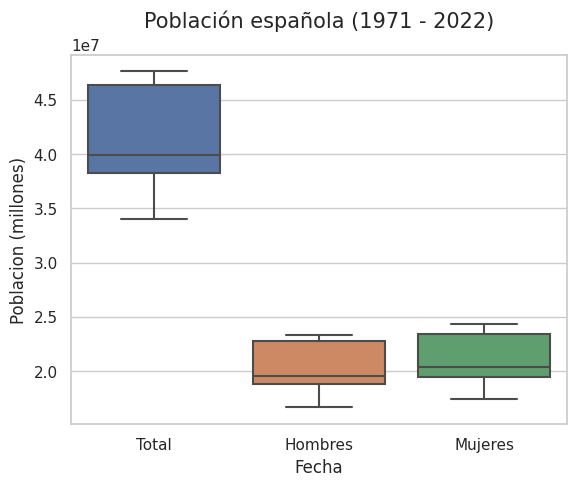

In [89]:
sns.boxplot(x = df.dato_2, y = df.poblacion)
plt.xlabel('Fecha')
plt.ylabel('Poblacion (millones)')
plt.title ('Población española (1971 - 2022)', fontsize=15, pad = 20);

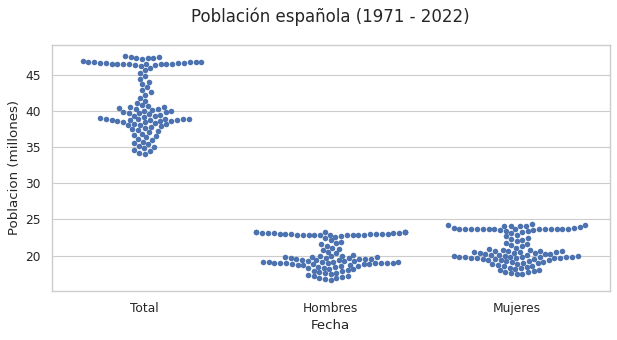

In [90]:
plt.figure(figsize = (9,4), dpi = 80)
sns.swarmplot(x = df.dato_2, y = df.poblacion/1000000)
plt.xlabel('Fecha')
plt.ylabel('Poblacion (millones)')
plt.title ('Población española (1971 - 2022)', fontsize=15, pad = 20);

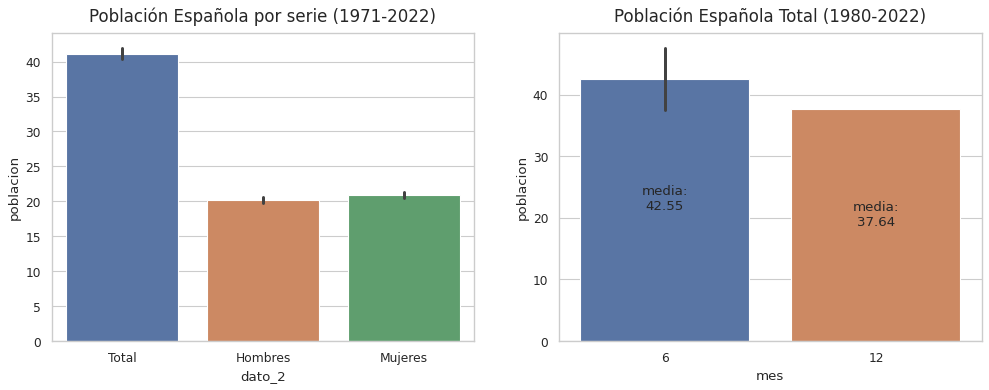

In [91]:
fig, axes = plt.subplots(1,2, figsize=(15,5), dpi=80)


sns.barplot(x='dato_2', y=df.poblacion/1000000, data=df, ax=axes[0])
sns.barplot(x='mes', y=df.poblacion/1000000, data=df[(df.dato_2 == 'Total') & (df.año.isin([1980,2022]))])

axes[0].set_title('Población Española por serie (1971-2022)', fontsize=15, pad=10)
for p in axes[1].patches:
    axes[1].annotate(f'media:\n{p.get_height():0.2f}', (p.get_x() +p.get_width() / 2.,+ p.get_height()/2),
                    ha= 'center', va='center', xytext=(0,10), textcoords='offset points')
axes[1].set_title('Población Española Total (1980-2022)', fontsize=15, pad=10);
plt.show()

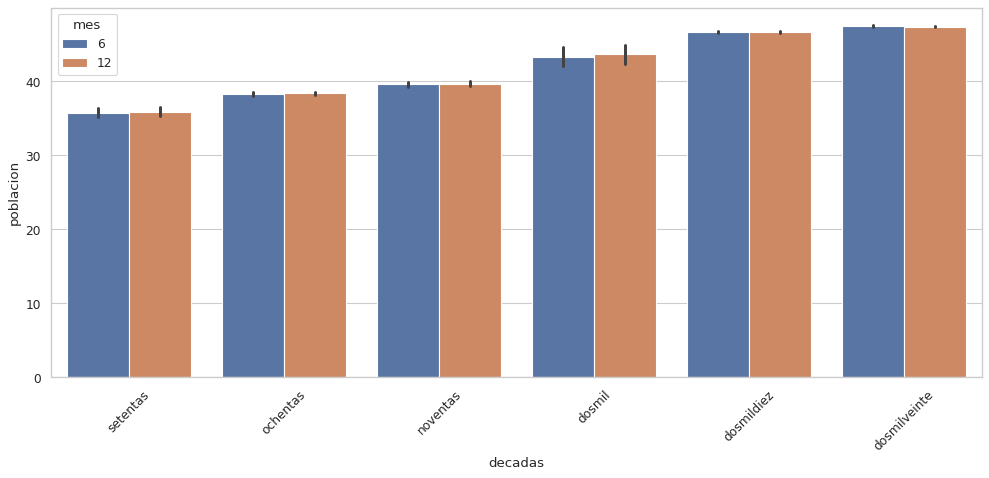

In [92]:
plt.figure(figsize=(15,6), dpi=80)

sns.barplot(x='decadas', y=df.poblacion/1000000, data=df[df.dato_2 == 'Total'], hue = 'mes')
plt.xticks(rotation = 45);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8299f17b-1fbe-4326-8e2f-66737306c401' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>